In [1]:
import pandas as pd
df = pd.read_csv("datasets/table_4_12.csv", header=None)

samples = df[[0, 1]].values
labels = df[[2]].values

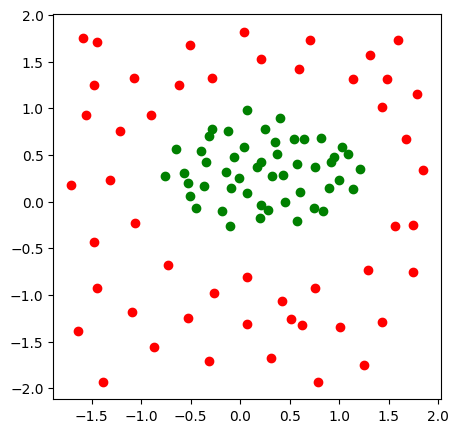

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))

for sample in df.values:
    plt.scatter(sample[0],sample[1], marker='o', color='g' if sample[2] > 0 else 'r')

In [6]:
import quark

ff_model = quark.Model("IterativeFeedForward")

ff_sample = samples.tolist()
ff_labels = labels.tolist()

ff_l1 = quark.Layer("Gradient", 2, 2, 0.01, "Sigmoid", 1, True)
ff_l2 = quark.Layer("Gradient", 1, 2, 0.01, "Sigmoid", 1, True)
ff_model.push_layer(ff_l1)
ff_model.push_layer(ff_l2)

ff_model.fit(ff_sample, ff_labels, 4000, 0.001)

Minimum atteint: 0.03586756686074032


Text(0, 0.5, 'Mean Square Error')

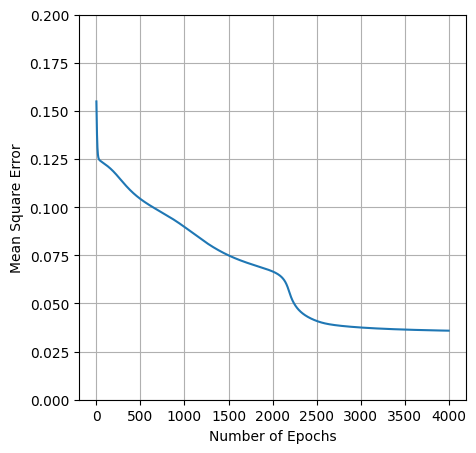

In [7]:
import matplotlib.pyplot as plt

mse = ff_model.mse
print(f"Minimum atteint: {min(mse)}")
len(mse)

plt.figure(figsize=(5, 5))
plt.plot(range(len(mse)), mse)
plt.ylim(0, 0.2)
plt.grid()

plt.xlabel("Number of Epochs")
plt.ylabel("Mean Square Error")

Text(0, 0.5, 'x2')

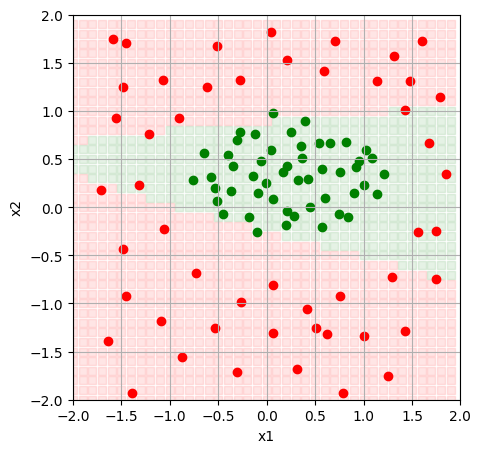

In [8]:
import matplotlib.pyplot as plt
import numpy as np

xlim = [-2, 2]
ylim = [-2, 2]
step = 0.1

plt.figure(figsize=(5, 5))

for x in np.arange(xlim[0], xlim[1], step):
    for y in np.arange(ylim[0], ylim[1], step):
        pred = ff_model.predict([x, y])
        plt.scatter(x, y, marker="s", color='g' if pred[0] > 0.5 else 'r', alpha= 0.1)

for sample in df.values:
    plt.scatter(sample[0],sample[1], marker='o', color='g' if sample[2] > 0 else 'r')

plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.grid()

plt.xlabel("x1")
plt.ylabel("x2")